Saving population_by_age_group.csv to population_by_age_group.csv
User uploaded file "population_by_age_group.csv" with length 12711 bytes
 Dataset Shape (Rows, Columns): (235, 7)

 Total Columns: 7

 Total Rows: 235

 Missing Values per Column:
Country        0
Total          0
65+            0
25-64 years    0
15-24 years    0
5-14 years     0
0-4 years      0
dtype: int64

 Total Duplicate Rows: 0


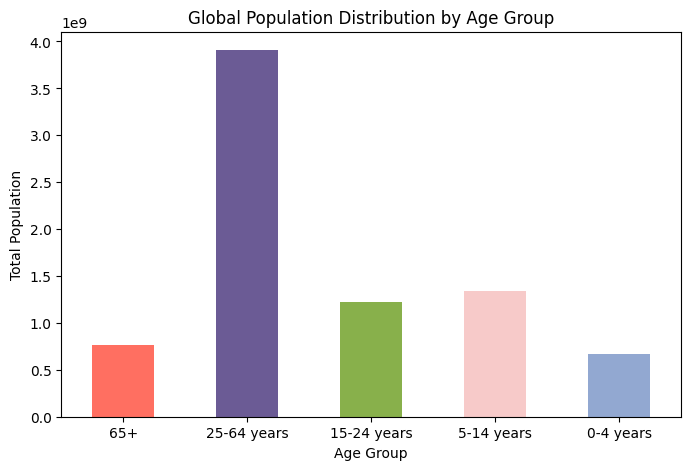

<Figure size 1500x700 with 0 Axes>

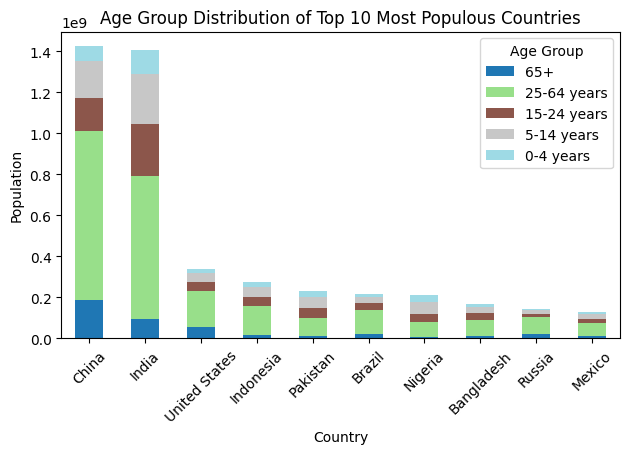

<Figure size 1500x700 with 0 Axes>

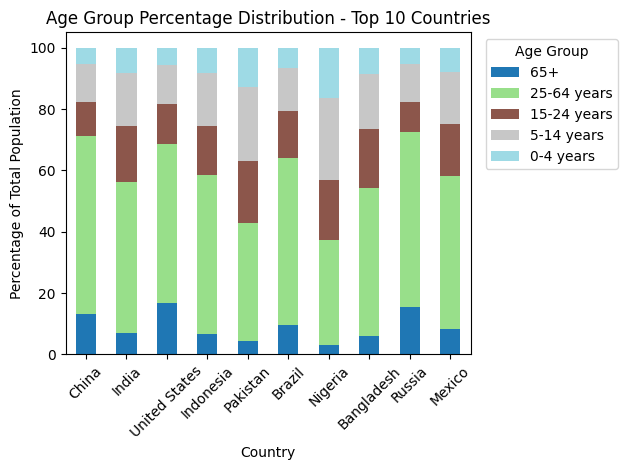

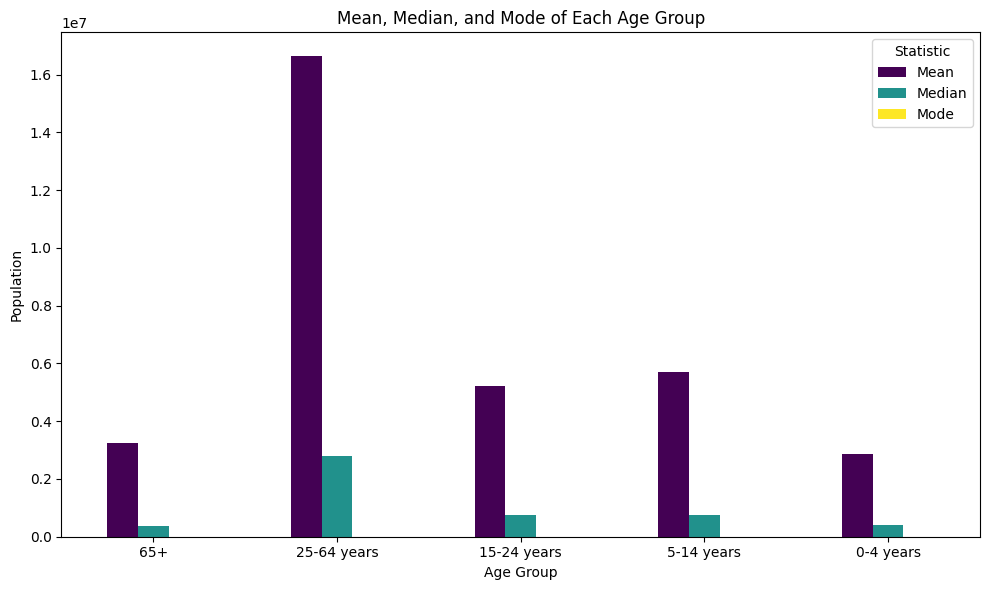

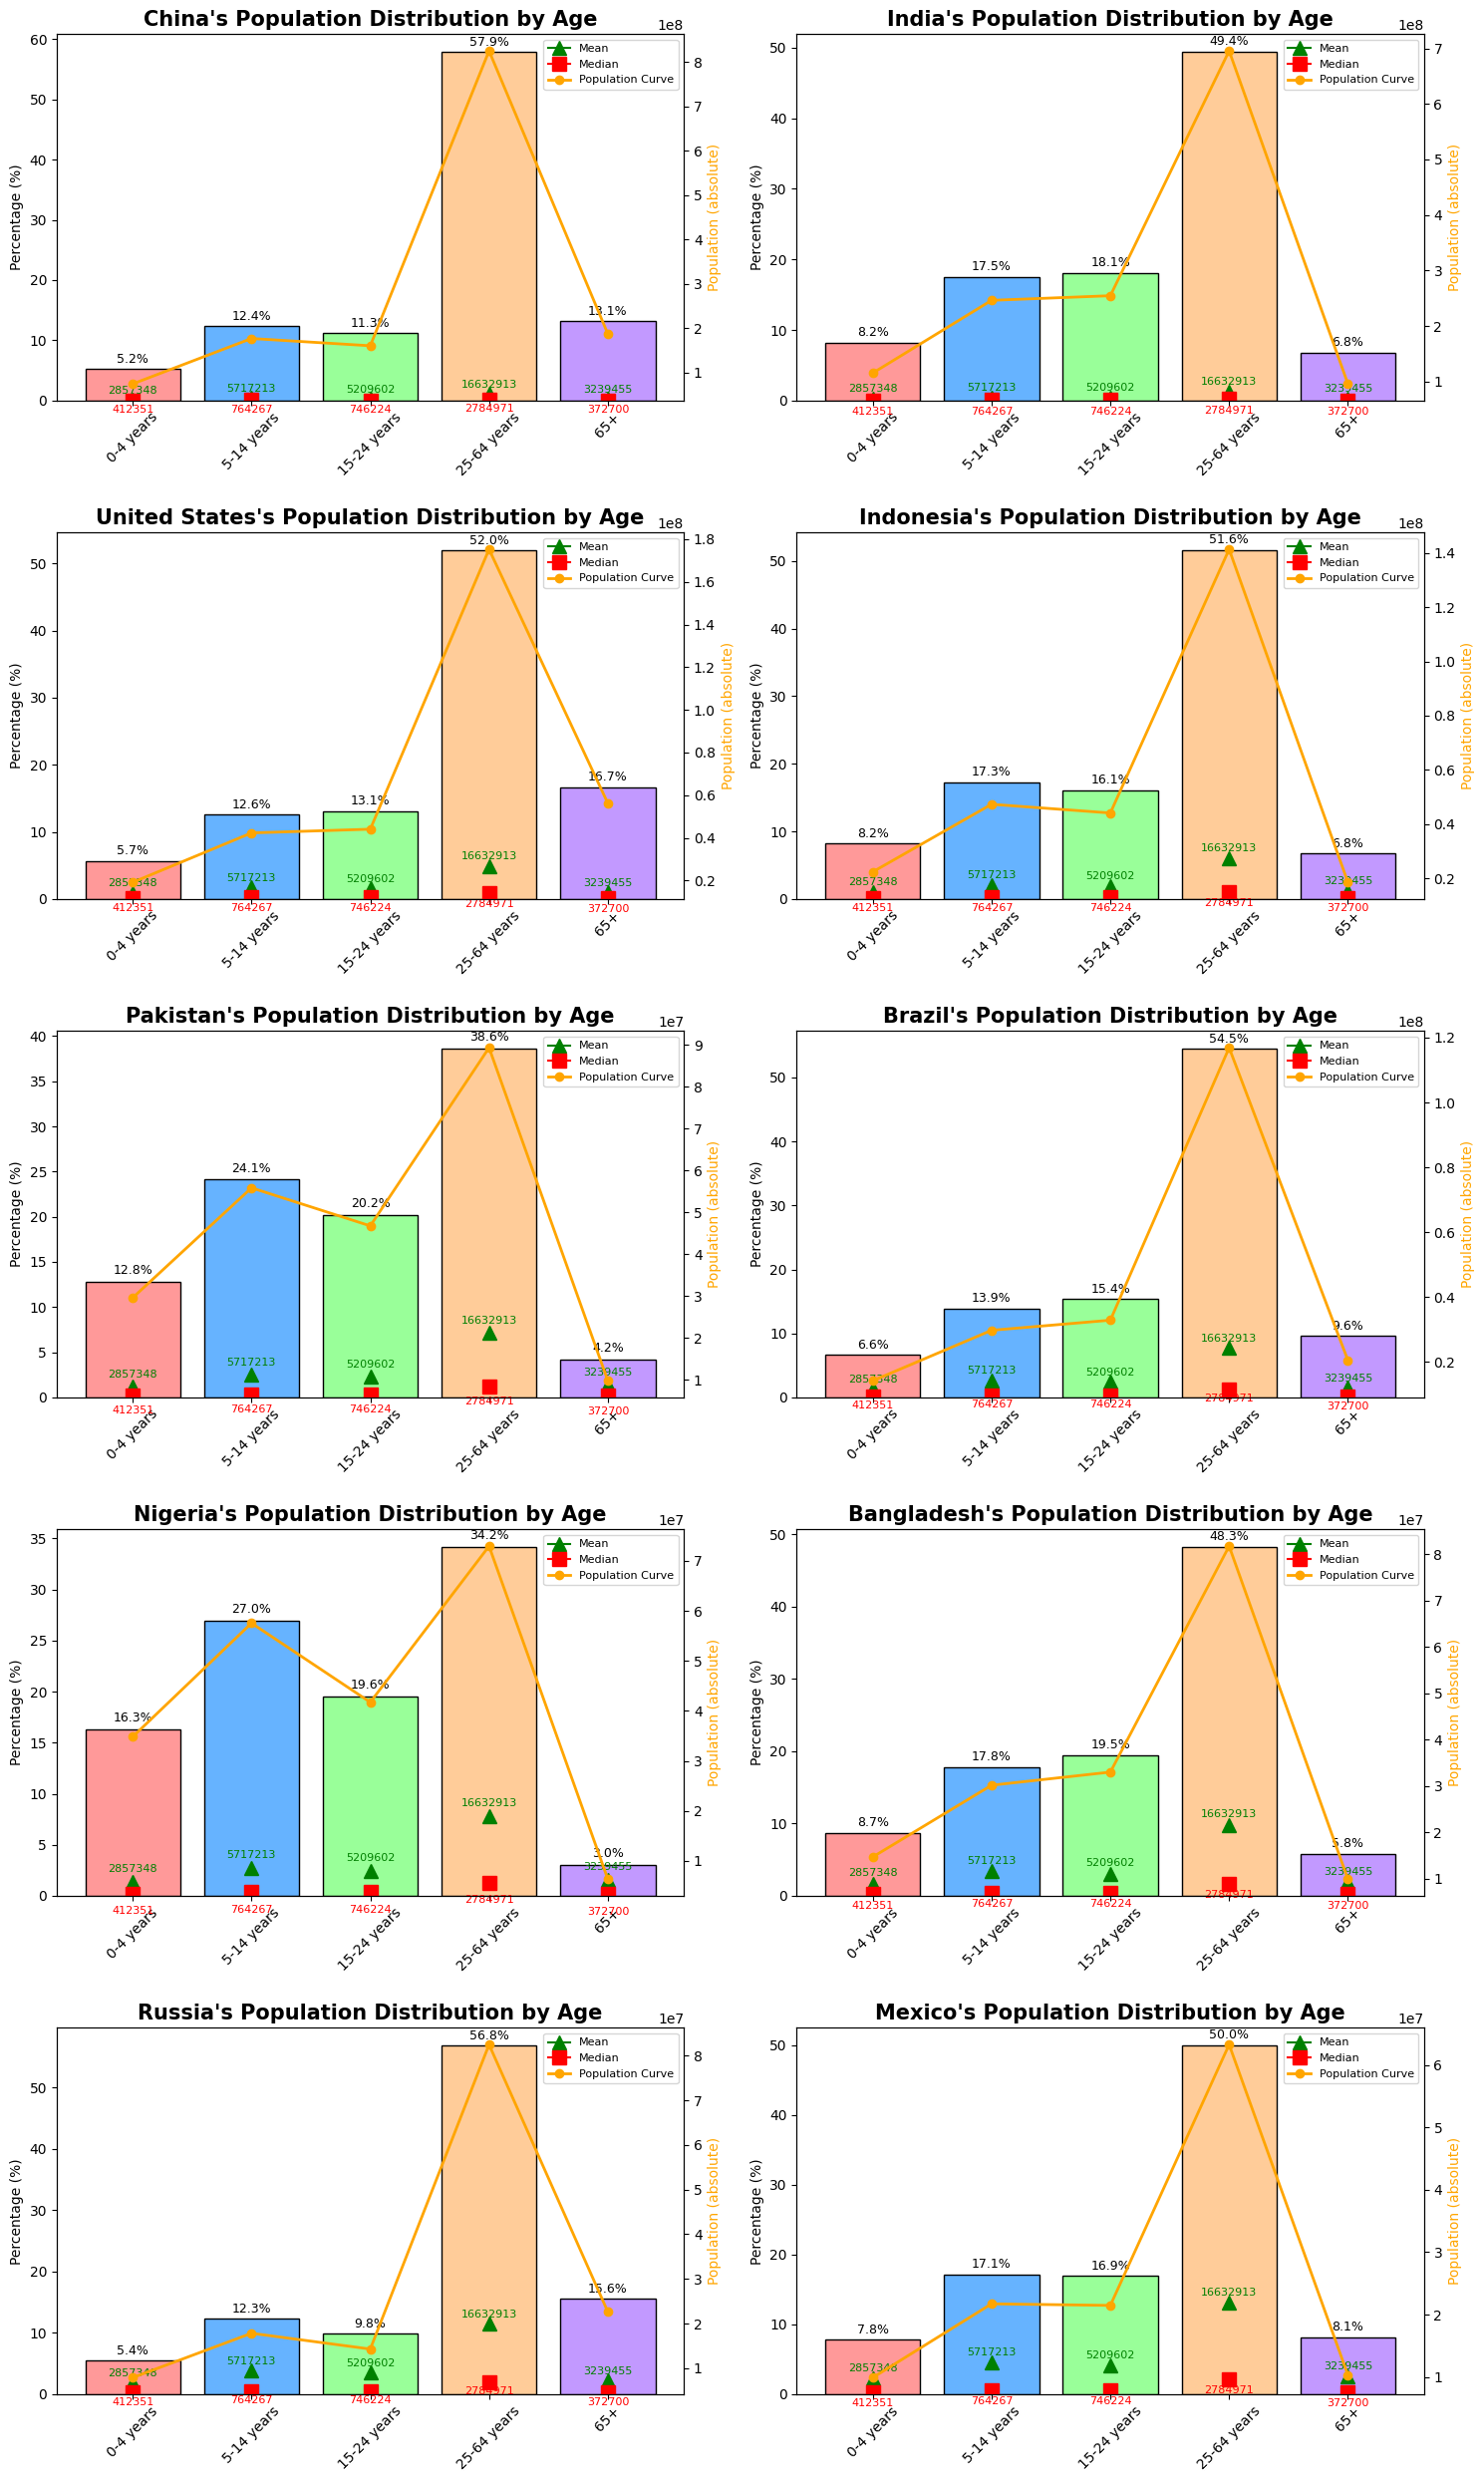

In [1]:
"""First upload dataset on google colab"""
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("population_by_age_group.csv")
df.head()
# Dataset overview
print(" Dataset Shape (Rows, Columns):", df.shape)
print("\n Total Columns:", len(df.columns))
print("\n Total Rows:", len(df))

# Missing values per column
print("\n Missing Values per Column:")
print(df.isnull().sum())

# Duplicate rows
print("\n Total Duplicate Rows:", df.duplicated().sum())

df.dtypes
# Sum populations for each age group across all countries
age_groups = ['65+', '25-64 years', '15-24 years', '5-14 years', '0-4 years']
age_totals = df[age_groups].sum()

# Create a bar chart
plt.figure(figsize=(8,5))
age_totals.plot(kind='bar', color=['#FF6F61','#6B5B95','#88B04B','#F7CAC9','#92A8D1'])
plt.title("Global Population Distribution by Age Group")
plt.ylabel("Total Population")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.show()
# Select age group columns
age_groups = ['65+', '25-64 years', '15-24 years', '5-14 years', '0-4 years']

# Select top 10 countries by total population
df_top10 = df.nlargest(10, 'Total')

# Create stacked bar chart
plt.figure(figsize=(15,7))
df_top10.set_index('Country')[age_groups].plot(kind='bar', stacked=True, colormap='tab20')

plt.title("Age Group Distribution of Top 10 Most Populous Countries")
plt.ylabel("Population")
plt.xlabel("Country")
plt.xticks(rotation=45)  # rotate x-axis labels for readability
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()
# Select top 10 countries by total population
df_top10 = df.nlargest(10, 'Total')

# Age group columns
age_groups = ['65+', '25-64 years', '15-24 years', '5-14 years', '0-4 years']

# Calculate percentages for each country
df_percent = df_top10.copy()
df_percent[age_groups] = df_percent[age_groups].div(df_percent['Total'], axis=0) * 100

# Create normalized stacked bar chart
plt.figure(figsize=(15,7))
df_percent.set_index('Country')[age_groups].plot(kind='bar', stacked=True, colormap='tab20')

plt.title("Age Group Percentage Distribution - Top 10 Countries")
plt.ylabel("Percentage of Total Population")
plt.xlabel("Country")
plt.xticks(rotation=45)

# Move legend to the right side
plt.legend(title="Age Group", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()
# Age group columns
age_groups = ['65+', '25-64 years', '15-24 years', '5-14 years', '0-4 years']

# Calculate statistics
means = df[age_groups].mean()
medians = df[age_groups].median()
modes = df[age_groups].mode().iloc[0]

# Combine stats into one dataframe for plotting
stats_df = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

# Plotting
stats_df.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Mean, Median, and Mode of Each Age Group")
plt.ylabel("Population")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(title="Statistic")
plt.tight_layout()
plt.show()
# Top 10 countries
top_countries = ["China", "India", "United States", "Indonesia", "Pakistan",
                 "Brazil", "Nigeria", "Bangladesh", "Russia", "Mexico"]

# Age group columns
age_groups = ['0-4 years', '5-14 years', '15-24 years', '25-64 years', '65+']

# Colors for each age group
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C299FF']

# Calculating mean and median **per age group across all countries**
age_group_means = df[age_groups].mean()
age_group_medians = df[age_groups].median()

# Creating subplots (5 rows × 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()

for i, country in enumerate(top_countries):
    ax1 = axes[i]
    df_country = df[df['Country'] == country]

    pop_values = df_country[age_groups].values.flatten()
    total_pop = df_country['Total'].values[0]
    percentage = (pop_values / total_pop) * 100

    # Bar chart for percentage distribution
    bars = ax1.bar(age_groups, percentage, color=colors, edgecolor='black')

    # Annotate percentage values on bars
    for bar, perc in zip(bars, percentage):
        ax1.text(bar.get_x() + bar.get_width()/2, perc + 0.5, f"{perc:.1f}%",
                 ha='center', va='bottom', fontsize=9, color='black')

    # Plot mean and median **for each age group** on the bar
    for j, age in enumerate(age_groups):
        # Convert mean/median to percentage for plotting on bar chart
        mean_perc = (age_group_means[age] / total_pop) * 100
        median_perc = (age_group_medians[age] / total_pop) * 100

        # Markers on bars
        ax1.plot(j, mean_perc, marker='^', color='green', markersize=10, label='Mean' if j==0 else "")
        ax1.plot(j, median_perc, marker='s', color='red', markersize=10, label='Median' if j==0 else "")

        # Annotate mean/median next to marker
        ax1.text(j, mean_perc+1, f"{int(age_group_means[age])}", color='green', ha='center', fontsize=8)
        ax1.text(j, median_perc-2, f"{int(age_group_medians[age])}", color='red', ha='center', fontsize=8)

    # Secondary axis for population curve
    ax2 = ax1.twinx()
    ax2.plot(age_groups, pop_values, color='orange', marker='o', linewidth=2, label='Population Curve')
    ax2.set_ylabel("Population (absolute)", color='orange')

    # Titles & labels
    ax1.set_title(f"{country}'s Population Distribution by Age", fontsize=15, fontweight='bold')
    ax1.set_ylabel("Percentage (%)")
    ax1.tick_params(axis='x', rotation=45)

    # Combining legends
    lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax1.legend(lines, labels, loc='upper right', fontsize=8)

# Removing empty subplots if any
for j in range(len(top_countries), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()